# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
api_key = weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | leshukonskoye
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | brigantine
Processing Record 12 of Set 1 | yumen
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | rio gallegos
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | charlottetown
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | natal
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | albany
Proces

Processing Record 37 of Set 4 | okhotsk
Processing Record 38 of Set 4 | vynohradove
Processing Record 39 of Set 4 | bentiu
Processing Record 40 of Set 4 | pilar
Processing Record 41 of Set 4 | moussoro
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | linkebeek
Processing Record 46 of Set 4 | saryg-sep
Processing Record 47 of Set 4 | palora
Processing Record 48 of Set 4 | port hawkesbury
Processing Record 49 of Set 4 | bathsheba
Processing Record 0 of Set 5 | arraial do cabo
Processing Record 1 of Set 5 | cape town
Processing Record 2 of Set 5 | wattegama
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | ambovombe
Processing Record 6 of Set 5 | akdepe
Processing Record 7 of Set 5 | tecoanapa
Processing Record 8 of Set 5 | bonthe
Processing Record 9 of Set 5 | igarka
Processing Record 10 of Set 5 | t

Processing Record 26 of Set 8 | mount gambier
Processing Record 27 of Set 8 | yulara
Processing Record 28 of Set 8 | bagdarin
Processing Record 29 of Set 8 | spring valley
Processing Record 30 of Set 8 | quatre cocos
Processing Record 31 of Set 8 | gayeri
Processing Record 32 of Set 8 | yabassi
Processing Record 33 of Set 8 | jacqueville
Processing Record 34 of Set 8 | uddevalla
Processing Record 35 of Set 8 | poplar bluff
Processing Record 36 of Set 8 | rock sound
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | dondo
Processing Record 39 of Set 8 | inhambane
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | jibuti
Processing Record 42 of Set 8 | alexandria
Processing Record 43 of Set 8 | lumberton
Processing Record 44 of Set 8 | dubai
Processing Record 45 of Set 8 | surin
Processing Record 46 of Set 8 | gorontalo
Processing Record 47 of Set 8 | berlevag
Processing Record 48 of Set 8 | inirida
Processing Record 49 of Set 8 | balaipungut
Process

Processing Record 16 of Set 12 | bodden town
Processing Record 17 of Set 12 | obo
Processing Record 18 of Set 12 | wewak
Processing Record 19 of Set 12 | hualmay
Processing Record 20 of Set 12 | grindavik
Processing Record 21 of Set 12 | alofi
Processing Record 22 of Set 12 | beyneu
Processing Record 23 of Set 12 | brainerd
Processing Record 24 of Set 12 | catamarca
Processing Record 25 of Set 12 | buqayq
City not found. Skipping...
Processing Record 26 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 27 of Set 12 | witrivier
City not found. Skipping...
Processing Record 28 of Set 12 | kegayli
City not found. Skipping...
Processing Record 29 of Set 12 | iztapa
Processing Record 30 of Set 12 | casino
Processing Record 31 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 32 of Set 12 | pontypridd
Processing Record 33 of Set 12 | stryn
Processing Record 34 of Set 12 | makakilo city
Processing Record 35 of Set 12 | hervey bay
Processing Record 36 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,19.33,96,24,1.31,ZA,1680472582
1,rikitea,-23.1203,-134.9692,26.80,81,24,7.17,PF,1680472582
2,hobart,-42.8794,147.3294,12.81,81,20,4.12,AU,1680471787
3,saskylakh,71.9167,114.0833,-8.34,96,100,1.81,RU,1680472582
4,jamestown,42.0970,-79.2353,7.51,32,0,1.54,US,1680472413


In [6]:
# Convert Unix timestamp to datetime and format as mm/dd/yyyy
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s").dt.strftime("%m/%d/%Y")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,19.33,96,24,1.31,ZA,04/02/2023
1,rikitea,-23.1203,-134.9692,26.80,81,24,7.17,PF,04/02/2023
2,hobart,-42.8794,147.3294,12.81,81,20,4.12,AU,04/02/2023
3,saskylakh,71.9167,114.0833,-8.34,96,100,1.81,RU,04/02/2023
4,jamestown,42.0970,-79.2353,7.51,32,0,1.54,US,04/02/2023


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,19.33,96,24,1.31,ZA,04/02/2023
1,rikitea,-23.1203,-134.9692,26.80,81,24,7.17,PF,04/02/2023
2,hobart,-42.8794,147.3294,12.81,81,20,4.12,AU,04/02/2023
3,saskylakh,71.9167,114.0833,-8.34,96,100,1.81,RU,04/02/2023
4,jamestown,42.0970,-79.2353,7.51,32,0,1.54,US,04/02/2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

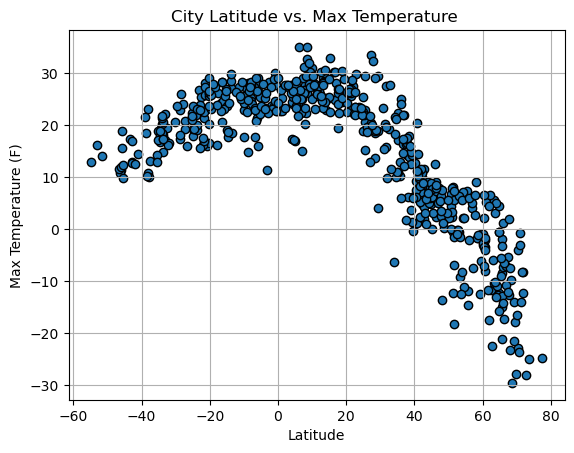

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

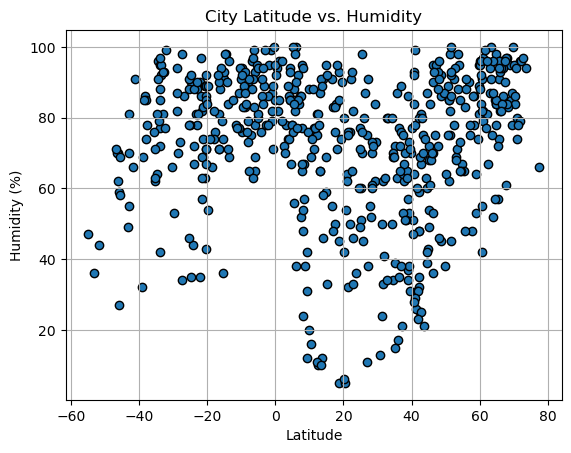

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

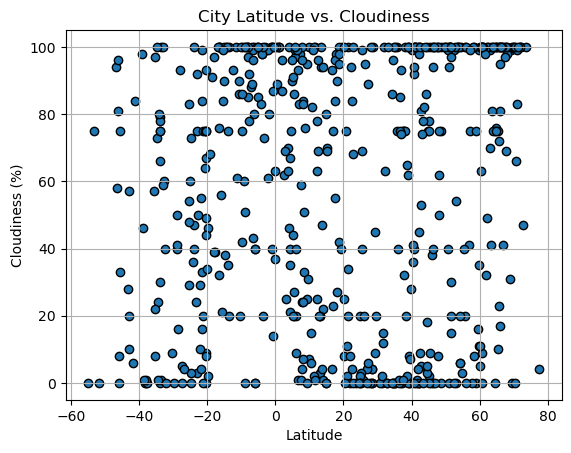

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

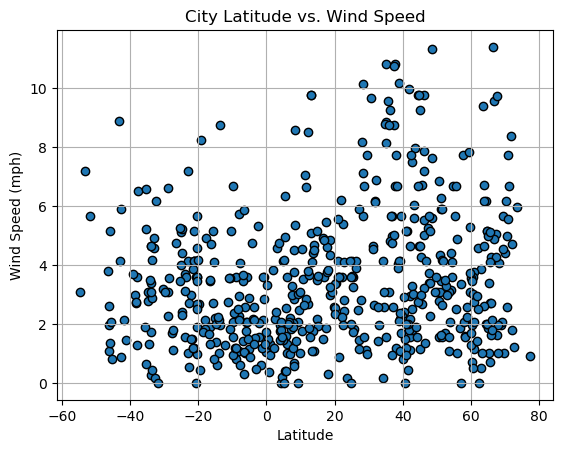

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    r_squared = round(r_value**2, 2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return regress_values, r_value

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,saskylakh,71.9167,114.0833,-8.34,96,100,1.81,RU,04/02/2023
4,jamestown,42.0970,-79.2353,7.51,32,0,1.54,US,04/02/2023
7,leshukonskoye,64.8989,45.7622,-12.38,98,76,1.85,RU,04/02/2023
9,tasiilaq,65.6145,-37.6368,-1.91,91,100,2.71,GL,04/02/2023
10,brigantine,39.4101,-74.3646,13.35,31,0,5.66,US,04/02/2023


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,19.33,96,24,1.31,ZA,04/02/2023
1,rikitea,-23.1203,-134.9692,26.80,81,24,7.17,PF,04/02/2023
2,hobart,-42.8794,147.3294,12.81,81,20,4.12,AU,04/02/2023
5,faanui,-16.4833,-151.7500,28.21,71,100,3.45,PF,04/02/2023
6,vaini,-21.2000,-175.2000,28.09,69,20,5.14,TO,04/02/2023


###  Temperature vs. Latitude Linear Regression Plot

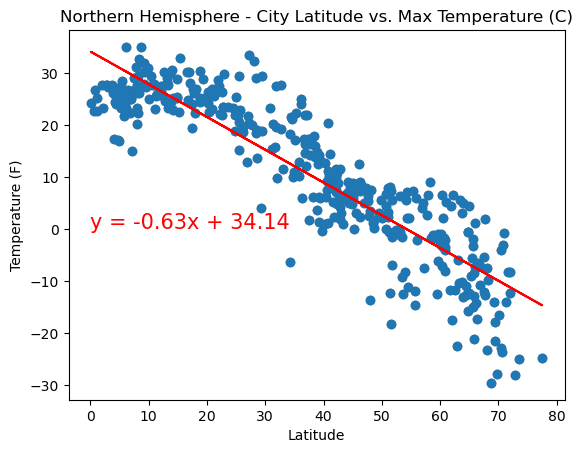

(City_ID
 3     -11.182902
 4       7.609021
 7      -6.760391
 9      -7.211351
 10      9.302265
          ...    
 559     4.876351
 560    -7.296741
 561    19.916721
 562    -1.919311
 563    30.499037
 Name: Lat, Length: 382, dtype: float64,
 -0.8977099446180492)

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

plot_linear_regression(x_values, y_values, "Northern Hemisphere - City Latitude vs. Max Temperature (C)",
                       "Latitude", "Temperature (F)", (0,0))

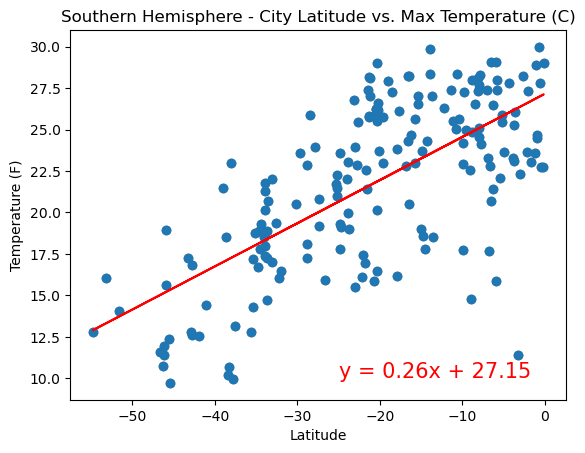

(City_ID
 0      18.198379
 1      21.136431
 2      15.998246
 5      22.862326
 6      21.635788
          ...    
 543    27.018646
 547    17.167419
 552    24.849068
 557    23.148371
 558    26.187709
 Name: Lat, Length: 182, dtype: float64,
 0.6824346071908095)

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

plot_linear_regression(x_values, y_values, "Southern Hemisphere - City Latitude vs. Max Temperature (C)",
                       "Latitude", "Temperature (F)", (-25,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [18]:
# In both the northern and southern hemispheres as the values got closer to 0 in latitude the temperature was
# the highest. In the northern scatter plot this would show as a decline as you moved further away and in
# the southern scatter plot this was shown as an incline. We could come to the conclusion that there is a corelation
# to temperature based on how close you are to 0 latitude in both scatterplots.

### Humidity vs. Latitude Linear Regression Plot

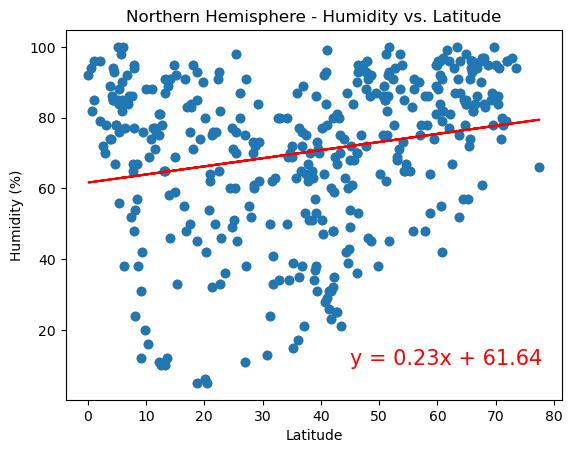

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Northern Hemisphere - Humidity vs. Latitude", 
                                        "Latitude", "Humidity (%)", (45,10))

plt.show()

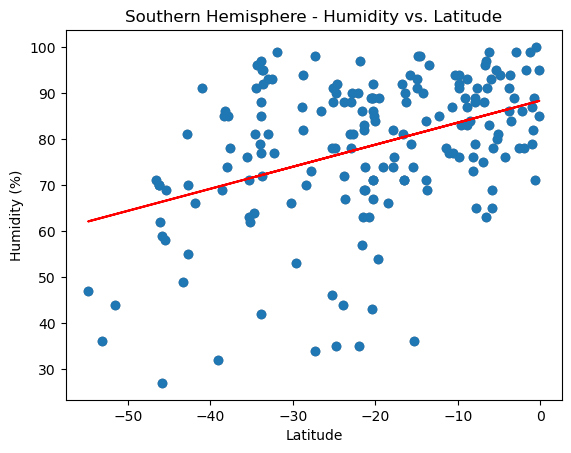

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Southern Hemisphere - Humidity vs. Latitude", 
                                        "Latitude", "Humidity (%)", (-25,20))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [21]:
#The regression line in both scatter plots is going up in the first its as you get further away from zero
#and in the second is as the values get closer to zero. Each scatterplot is showing a different relationship
#with humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

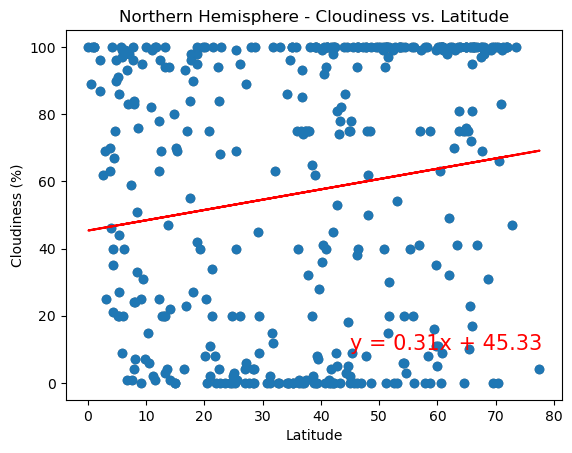

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Northern Hemisphere - Cloudiness vs. Latitude", 
                                        "Latitude", "Cloudiness (%)", (45,10))

plt.show()

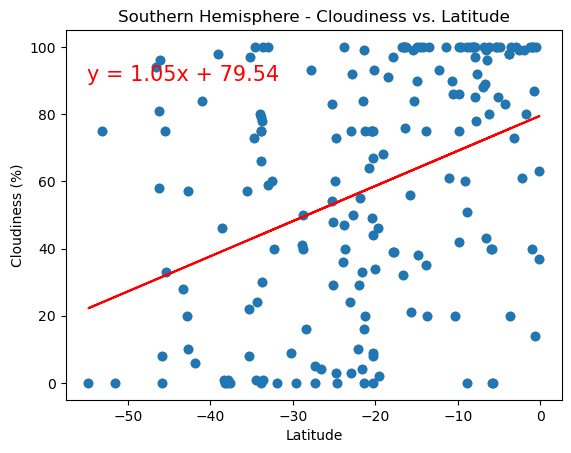

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Southern Hemisphere - Cloudiness vs. Latitude", 
                                        "Latitude", "Cloudiness (%)", (-55,90))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [24]:
#Like the humitity vs latitude this is another case where both scatter plots are showing a positive regression line
# though each is showing a different relationship as you move closer and further away from zero latitude. In this one
# you could come to the conclusion that its cloudier the further north you go and in the southern one its less cloudy
# the further south you move away from zero latitude.

### Wind Speed vs. Latitude Linear Regression Plot

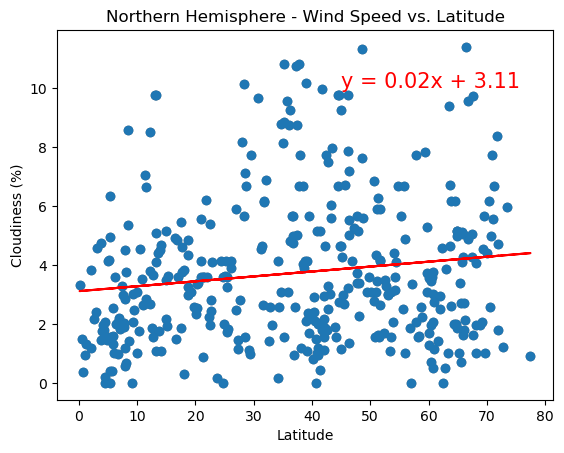

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Northern Hemisphere - Wind Speed vs. Latitude", 
                                        "Latitude", "Cloudiness (%)", (45,10))

plt.show()

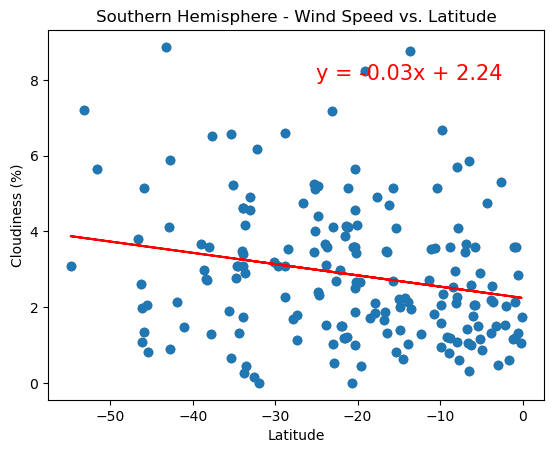

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.scatter(x_values, y_values, color='blue', edgecolor='black', alpha=0.5)

regress_values = plot_linear_regression(x_values, y_values, 
                                        "Southern Hemisphere - Wind Speed vs. Latitude", 
                                        "Latitude", "Cloudiness (%)", (-25,8))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Each scatterplot is going in opposite direction with the northern one being positive and the southern one being
#negitive. With them doing the opposite thing its possible that being closer to zero latitude could be less windy.